# The Titanic Problem Notebook
## 1.1 Import Module & Benennung des Datensets 

In [529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic_data = pd.read_csv(r'..\titanic.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1.2 Dateneigenschaften

In [530]:
# In welchen Formaten liegen die Daten vor?
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [531]:
# Welche Daten haben numerische, welche kategorische Werte?

In [532]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [533]:
# In den Spalten 'Cabin' und 'Embarked' gibt es NaN-Werte, die vorher nicht berücksichtigt wurden,
titanic_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [534]:
# Suche nach weiteren fehlenden Werten im Datensatz: 
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. Datenerfassung & Bereinigung
## 2.1 Beobachtungen
Der Datensatz umfasst *12 Spalten* und 891 Zeilen mit Informationen zu Passagieren der Titanic. Anbei eine Übersicht der Spalten und der hinterlegten Informationen:
**1. 'PassengerId'**
Enthält die PassagierId als Integer. Die hinterlegten Zahlen stehen für die IDs und reichen von 1 - 891.

**2. 'Survived'**
Enthält den Überlebensstatus als Integer. 0 = hat nicht überlebt. 1 = hat überlebt.
 
**3. 'Pclass'**
Enthält die Passagierklasse als Integer. Die Zahlen der unterschiedlichen Klassen reichen von 1 - 3.
Frage: Wo genau lagen die Kabinen der Klassen auf dem Schiff? Sind sie etwa Etagen zugeordnet? Wie ist der Zusammenhang zwischen Pclass und Parch?
  
**4. 'Name'**
Enthält die nachfolgenden Informationen als String in der Reihenfolge:

*a. {Nachname} = Nachnamen. Wird in neue Spalte **'Surname'** ausgegliedert. Die Nachnamen werden in eine eigene Spalte {Surname} extrahiert, um später einfacher an Anreden/ Titel zu gelangen. Die Nachname  liegen als einfache Strings vor, z.B. 'Braund', 'Cumings' ...*

*b.  ',' = konstanter Separator nach 'Surname'*

*c.  {Anrede/ Titel} = Titel oder Anreden. Wird in neue Spalte **'Address'** ausgegliedert.*

*d.  Enthält verschiedene Titel und Anreden. Titel [], Anreden []*

*e.  '.' = konstanter Separator nach 'Address'*

*f.  {Vornamen} = ein oder mehrere Vornamen. Wird in neue Spalte **'First Name'** ausgegliedert. Die einzelnen Vornamen sind durch ' ' getrennt. Wenn 'Address' nicht 'Miss' ist, werden zuerst die Vornamen des Ehemanns angegeben.*

*g.  {Mädchenname} = Mädchenname. Wird in neue Spalte **'Maiden Name'** ausgegliedert. Wenn Titel/Anrede 'Mrs' ist, wird am Ende der Mädchenname in Klammern angegeben, z.B. (Florence Briggs Thayer). Spitznamen sind teilweise in Anführungszeichen angegeben, z.B. "Frankie"*
                                                                        
**5. 'Sex'**
Enthält das Geschlecht des Passagiers als String. Entweder 'female' für weiblich oder 'male' für männlich.

**6. 'Age'**
Enthält das Alter des Passagiers in Jahren als Float. Die Altersangaben, bsp. von Kindern unter einem Jahr, deuten darauf, dass bei der Datengenerierungen Berechnungen abgelaufen sind, die Floats mit bis zu zwei Nachkommastellen produziert habem. Wie diese Berechnung ablief, ist nicht zu rekonstruieren.

**7. 'SibSp'**
Enthält die Anzahl der Geschwister und/oder der Ehepartner als Integer.

**8. 'ParCh'**
Enthält die Anzahl der Elternteile und/oder der Kinder als Integer. Die Werte reichen von 0 - 3.

**9. 'Ticket'**
Enthält Ticketnamen als String. Diese Bezeichnungen setzten sich entweder nur aus Zahlen, aus einer Buchstabenfolge und Zahlen oder einer Kombination aus Sonderzeichen, Buchstaben und Zahlen.

**10. 'Fare'**
Enthält den Ticketpreis als Float mit 4 Nachkommastellen. Die Währung ist nicht angegeben.

**11. 'Cabin'**
Enthält den Namen der Kabine des Passagiers als String. Setzt sich zusammen aus Buchstaben und Zahlenfolge, bsp. 'C85', 'E46'.

**12 'Embarked'**
Enthält den Ort, an dem der Passagier zugestiegen ist als String. S = Southampton (England), C = Cherbourg (Frankreich), Q = Queenstown (Irland).

# 3. Datenbereinigung 


## 3.1 Bearbeitung der Spalte "Name"

### 3.1.1 Special Case: Noël Leslie, Countess of Rothes 

In [535]:
# Bei der Bereinigung der Namensspalte gab es einen Namen, der das einfache Trennen verhindert hat.
titanic_data.iloc[759]

PassengerId                                                  760
Survived                                                       1
Pclass                                                         1
Name           Rothes, the Countess. of (Lucy Noel Martha Dye...
Sex                                                       female
Age                                                         33.0
SibSp                                                          0
Parch                                                          0
Ticket                                                    110152
Fare                                                        86.5
Cabin                                                        B77
Embarked                                                       S
Name: 759, dtype: object

In [536]:
# 'of ' wird aus dem Passagiernamen gestrichen, da er sonst als Vorname aufgeführt wird.
rothes = titanic_data[titanic_data['Name'].str.contains('Rothes')]
titanic_data.loc[rothes.index,'Name'] = rothes['Name'].str.replace(r'of ', repl='', regex=True)

In [537]:
titanic_data.loc[rothes.index,'Name']

759    Rothes, the Countess. (Lucy Noel Martha Dyer-E...
Name: Name, dtype: object

### 3.1.2 Trennung der Namen zu 'Surname' und 'Name'

In [538]:
names_df = titanic_data['Name'].str.split(', ', n=1, expand=True)
titanic_data.insert(3, 'Surname', names_df[0])
titanic_data.insert(4, 'name', names_df[1])


In [539]:
del titanic_data['Name']
titanic_data.rename({'name': 'Name'}, axis=1, inplace=True)


In [540]:
titanic_data[['Surname', 'Name']]


,Surname,Name
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


### 3.1.3 Trennung der Namen in 'Address' und 'First Name'

In [541]:
names_df = titanic_data['Name'].str.split(r'\. ', n=1, regex=True, expand=True)
titanic_data.insert(3,'Address', names_df[0])
titanic_data['Name'] = titanic_data['Name'].str.replace(r'^[^.]*\.', '', regex=True)

In [542]:
titanic_data['Address'].value_counts()

Address
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

### 3.1.4 Trennung der Mädchennamen zu 'Name' und 'Maiden Name'

In [543]:
titanic_index = pd.Index(titanic_data.columns)
names_df = titanic_data['Name'].str.extract(r'\((.*?)\)', expand=False)
titanic_data.insert(titanic_index.get_loc('Name') + 1, column='Maiden Name', value=names_df)

In [544]:
titanic_data

,PassengerId,Survived,Pclass,Address,Surname,Name,Maiden Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,Braund,Owen Harris,NaN,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,Cumings,John Bradley (Florence Briggs Thayer),Florence Briggs Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,Heikkinen,Laina,NaN,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,Futrelle,Jacques Heath (Lily May Peel),Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,Allen,William Henry,NaN,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,Montvila,Juozas,NaN,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,Graham,Margaret Edith,NaN,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,Johnston,"Catherine Helen ""Carrie""",NaN,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,Behr,Karl Howell,NaN,male,26.0,0,0,111369,30.0000,C148,C


## 3.2 Mitgereiste Familienmitglieder

In [545]:
titanic_data['Fam'] = titanic_data["SibSp"] + titanic_data["Parch"] + 1

In [546]:
titanic_data[['Fam','Survived']]

,Fam,Survived
0,2,0
1,2,1
2,1,1
3,2,1
4,1,0
...,...,...
886,1,0
887,1,1
888,4,0
889,1,1


## 3.3 Aufteilung der Kabinen & Ergänzung fehlender Werte

In [547]:
cabin_df = titanic_data['Cabin']
pattern = r'([A-Z]?).*'
titanic_data['Cabin_Loc'] = cabin_df.str.extract(pattern, expand=True)


In [548]:
# Um später Aussagen über fehlende Kabinenangaben machen zu können, wir ein Wert 'N' für die Nan-Werte der Kabinenspalte genutzt.
titanic_data['Cabin_Loc'] = titanic_data['Cabin_Loc'].fillna('N')

In [549]:
titanic_data['Cabin_Loc'].value_counts()

Cabin_Loc
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

# 4. Datenanalyse

## 4.1 Überlebensrate insgesamt


In [550]:
survival_rate = titanic_data['Survived'].mean()
print(f"Die Überlebensrate beträgt: {survival_rate:.2f}")
# Diagramm für Überlebende (Anteil Überlebende und Tote)

Die Überlebensrate beträgt: 0.38


## 4.2 Überlebensrate nach Passagierklasse (Pclass) und Kabine (Cabin)

In [551]:
pclass_survival = titanic_data.groupby('Pclass')['Survived'].mean()

Überlebensrate nach Passagierklasse:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


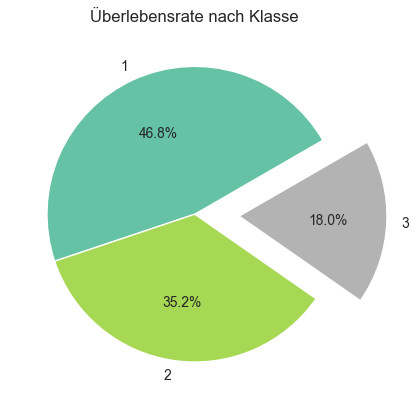

In [552]:
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()
survival_by_class.plot(kind='pie', 
                       title='Überlebensrate nach Klasse',
                       explode=(0,0,0.3),
                       autopct='%1.1f%%',
                       startangle=30,
                       cmap='Set2',
                       ylabel='')

print(f"Überlebensrate nach Passagierklasse:\n{survival_by_class}")

In [553]:
cabin_survival = titanic_data.groupby('Cabin_Loc')['Survived'].agg(['mean','count'])
print(cabin_survival)
print(f"Von {len(titanic_data)} Einträgen im Datensatz hatten nur {titanic_data['Cabin'].count()} eine Kabinenangabe.") 

               mean  count
Cabin_Loc                 
A          0.466667     15
B          0.744681     47
C          0.593220     59
D          0.757576     33
E          0.750000     32
F          0.615385     13
G          0.500000      4
N          0.299854    687
T          0.000000      1
Von 891 Einträgen im Datensatz hatten nur 204 eine Kabinenangabe.


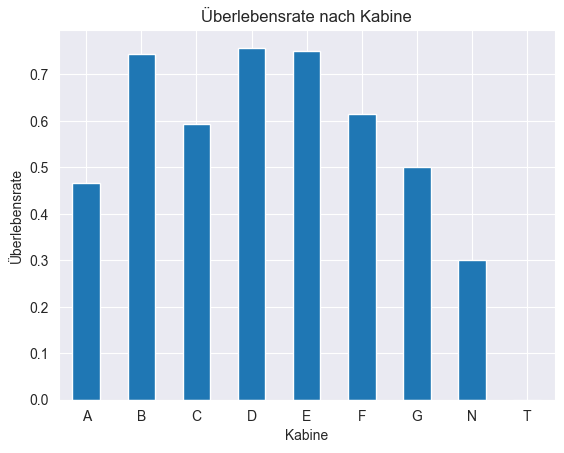

In [554]:
cabin_survival = titanic_data.groupby('Cabin_Loc')['Survived'].mean()
cabin_survival.plot(kind='bar',
                    title='Überlebensrate nach Kabine',
                    rot=0)

plt.xlabel('Kabine')
plt.ylabel('Überlebensrate')
plt.show()

### 4.3 Überlebensrate nach Geschlecht

In [555]:
survived_women = titanic_data.loc[titanic_data.Sex == 'female']["Survived"]
survived_men = titanic_data.loc[titanic_data.Sex == 'male']["Survived"]

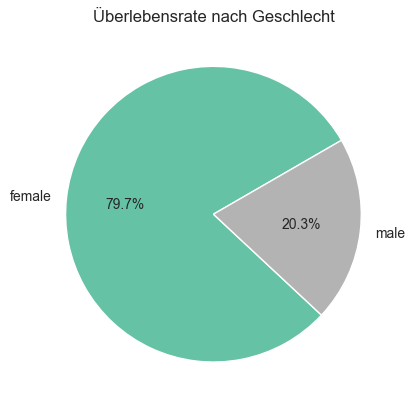

In [556]:
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean()
survival_by_gender.plot(kind='pie', 
                        title='Überlebensrate nach Geschlecht',
                        explode=(0,0),
                        autopct='%1.1f%%',
                        startangle=30,
                        cmap='Set2',
                        ylabel='');


In [557]:
print(f" Anhand des Datensatzes waren {survived_women.size} Frauen und {survived_men.size} Männer an Bord der Titanic. Davon haben {sum(survived_women)} Frauen ({(sum(survived_women) / survived_women.size)*100:.2f} %) und {sum(survived_men)} Männer ({(sum(survived_men) / survived_men.size)*100:.2f} %) überlebt.")

 Anhand des Datensatzes waren 314 Frauen und 577 Männer an Bord der Titanic. Davon haben 233 Frauen (74.20 %) und 109 Männer (18.89 %) überlebt.


In [558]:
titanic_data['Sex'].str.get_dummies().corrwith(titanic_data['Survived'] / titanic_data['Survived'].max())

female    0.543351
male     -0.543351
dtype: float64

## 4.4 Überlebensrate nach Alter

### 4.4.1 Altersverteilung der Passagiere

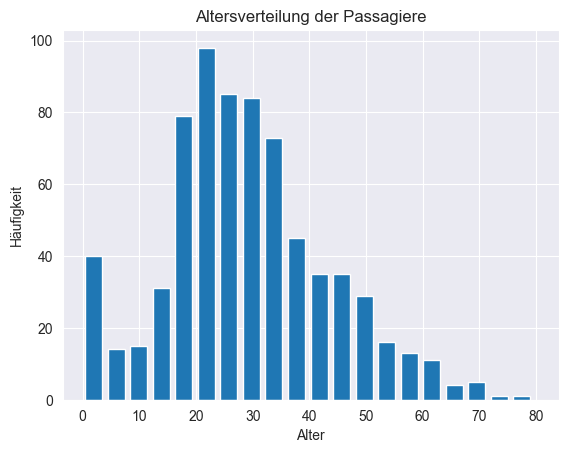

In [559]:
titanic_data['Age'].plot(kind='hist',
                         bins=20,
                         title='Altersverteilung der Passagiere',
                         xlabel='Alter',
                         width=3,
                         ylabel='Anzahl')

plt.xlabel('Alter')
plt.ylabel('Häufigkeit')
plt.show()

### 4.4.2 Altersverteilung nach Überlebenden und Verstorbenen

In [560]:
age_bins = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
titanic_data['AgeBins'] = pd.cut(titanic_data['Age'], range(0, 100, 10), labels=age_bins)
age_bins_df = titanic_data.groupby('AgeBins')['Survived'].agg(['mean', 'count', 'sum'])

print(age_bins_df)

             mean  count  sum
AgeBins                      
1-10     0.593750     64   38
11-20    0.382609    115   44
21-30    0.365217    230   84
31-40    0.445161    155   69
41-50    0.383721     86   33
51-60    0.404762     42   17
61-70    0.235294     17    4
71-80    0.200000      5    1
81-90         NaN      0    0


C:\Users\Admin\AppData\Local\Temp\ipykernel_716\3054478776.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bins_df = titanic_data.groupby('AgeBins')['Survived'].agg(['mean', 'count', 'sum'])


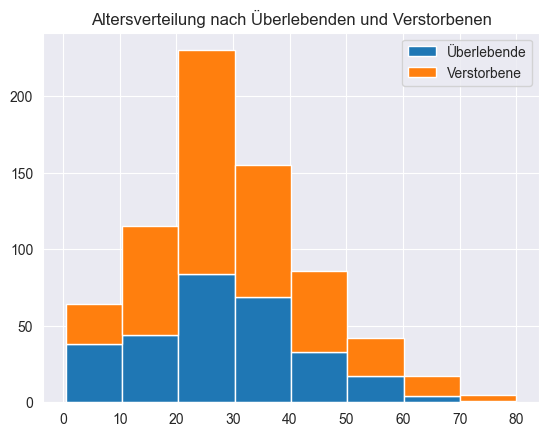

In [561]:
deceased = titanic_data[titanic_data['Survived'] == 0]['Age']
survived = titanic_data[titanic_data['Survived'] == 1]['Age']

plt.hist([survived, deceased],
         bins= 8,
         stacked=True)

plt.title('Altersverteilung nach Überlebenden und Verstorbenen')
plt.legend(['Überlebende', 'Verstorbene']);

In [562]:
titanic_data['Survived'].corr(titanic_data['Age'])

-0.07722109457217755

## 4.5 Überlebensrate von Passagieren mit Angehörigen

### 4.5.1 verheirateten und unverheirateten Frauen

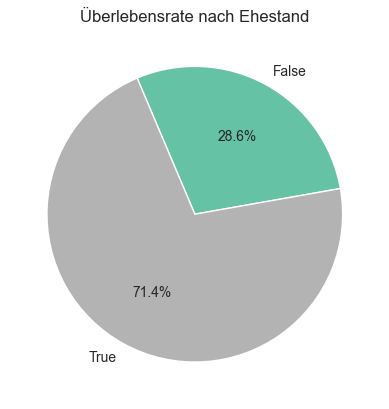

In [563]:
titanic_data['Married'] = titanic_data['Address'].str.contains('Mrs', case=False)
survival_by_married = titanic_data.groupby('Married')['Survived'].mean()

survival_by_married.plot(kind='pie', 
                         title='Überlebensrate nach Ehestand',
                         explode=(0,0),
                         autopct='%1.1f%%',
                         startangle=10,
                         cmap='Set2',
                         ylabel='');
                         
# plt.xlabel('Verheiratet')
# plt.ylabel('Überlebensrate')
# plt.xticks([0, 1], ['Unverheiratet', 'Verheiratet'])
# plt.show()

### 4.5.2 Überlebensrate von Passagieren mit Geschwistern/Ehepartnern an Bord

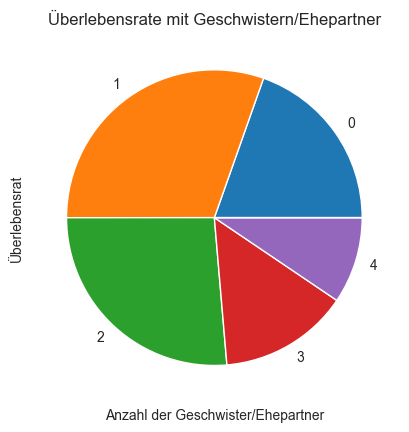

In [564]:
survival_with_siblings_spouse = titanic_data.groupby('SibSp')['Survived'].mean()
survival_with_siblings_spouse.plot(kind='pie', 
                                   title='Überlebensrate mit Geschwistern/Ehepartner')

plt.xlabel('Anzahl der Geschwister/Ehepartner')
plt.ylabel('Überlebensrat')
plt.show()

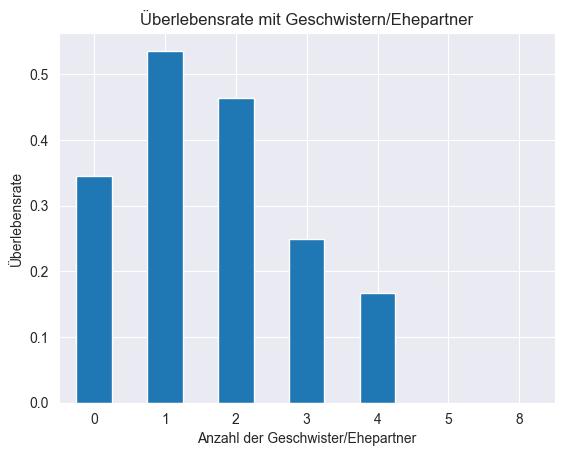

In [565]:
survival_with_siblings_spouse = titanic_data.groupby('SibSp')['Survived'].mean()
survival_with_siblings_spouse.plot(kind='bar',
                                   title='Überlebensrate mit Geschwistern/Ehepartner',
                                   rot=0)

plt.xlabel('Anzahl der Geschwister/Ehepartner')
plt.ylabel('Überlebensrate')
plt.show()

In [566]:
titanic_data['Survived'].corr(titanic_data['SibSp'])

-0.035322498885735576

### 4.5.2 Überlebensrate von Passagieren mit Familienangehörigen an Bord

In [567]:
survival_with_fam = titanic_data.groupby('Fam')['Survived']
survival_with_fam.agg(['mean', 'count'])

,mean,count
Fam,,
1,0.303538,537
2,0.552795,161
3,0.578431,102
4,0.724138,29
5,0.200000,15
6,0.136364,22
7,0.333333,12
8,0.000000,6
11,0.000000,7


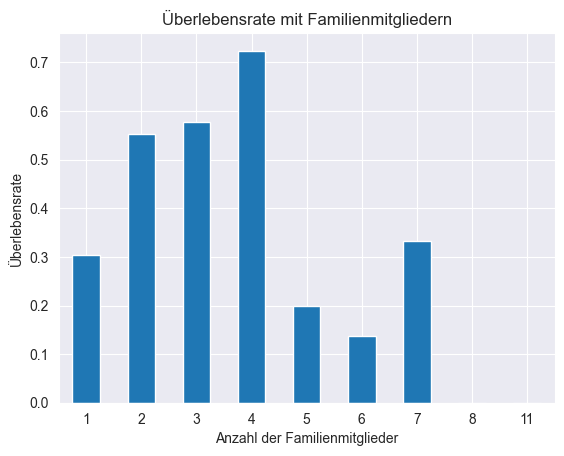

In [568]:
survival_with_fam = titanic_data.groupby('Fam')['Survived'].mean()
survival_with_fam.plot(kind='bar',
                       title='Überlebensrate mit Familienmitgliedern',
                       rot=0)

plt.xlabel('Anzahl der Familienmitglieder')
plt.ylabel('Überlebensrate')
plt.show()

In [569]:
titanic_data['Survived'].corr(titanic_data['Fam'])

0.01663898928274529